In [1]:
# Import Your Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms
from skimage.exposure import histogram

## Part 1

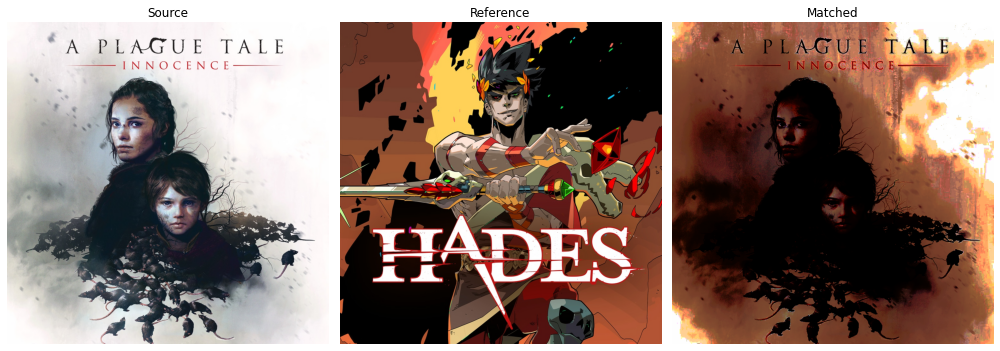

In [2]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = match_histograms(source, reference, channel_axis=-1)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 2

In [3]:
def hist_matching(src_image, ref_image):
    '''
    inputs:
    src_image (ndarray): source image
    ref_image (ndarray): reference image
    output:
    output_image (ndarray): transformed image 
    '''

    ### YOUR CODE ###
    # START

    output_image = src_image.copy()
    L = 256
    a, b, t = src_image.shape

    # Step 1
    h_r, bins = histogram(src_image[:,:,0], source_range='dtype')
    h_g, bins = histogram(src_image[:,:,1], source_range='dtype')
    h_b, bins = histogram(src_image[:,:,2], source_range='dtype')
    
    h_ref_r, bins = histogram(ref_image[:,:,0], source_range='dtype')
    h_ref_g, bins = histogram(ref_image[:,:,1], source_range='dtype')
    h_ref_b, bins = histogram(ref_image[:,:,2], source_range='dtype')

    # Step 2
    hists = [h_r, h_g, h_b, h_ref_r, h_ref_g, h_ref_b]
    for i in range (1, L):
        for j, hist in enumerate(hists):
            hist[i] += hist[i-1]

    # Step 3
    cdfs = []
    for i, hist in enumerate(hists):
        n = a * b
        cdfs.append(((L - 1) / n) * hist)
        cdfs[i] = np.round(cdfs[i])

    # Step 5
    for i in range(a):
        for j in range(b):
            for k in range(3):
                match_c = np.argwhere(cdfs[k + 3] >= cdfs[k][src_image[i,j]][k])
                output_image[i,j,k] = match_c[0][0]

    # END

    return output_image

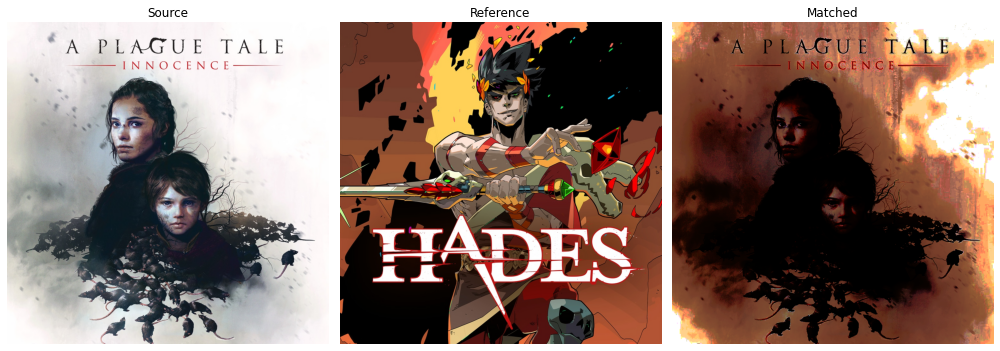

In [4]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = hist_matching(source, reference)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 3

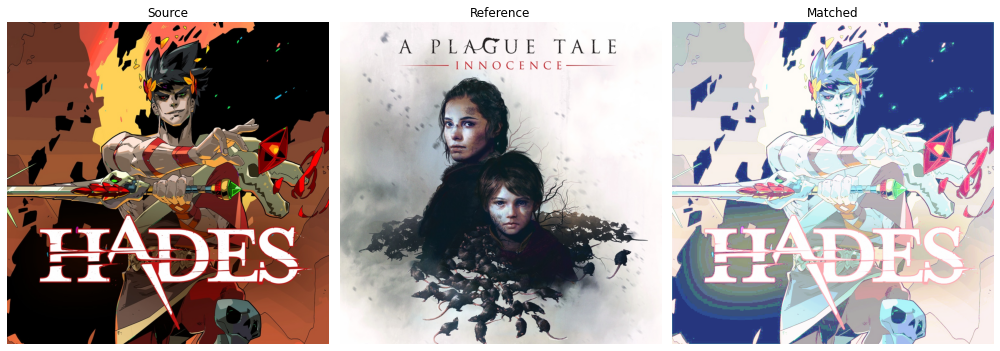

In [5]:
source = plt.imread('Hades.jpg')
reference = plt.imread('A Plague Tale.jpg')

matched = match_histograms(source, reference, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

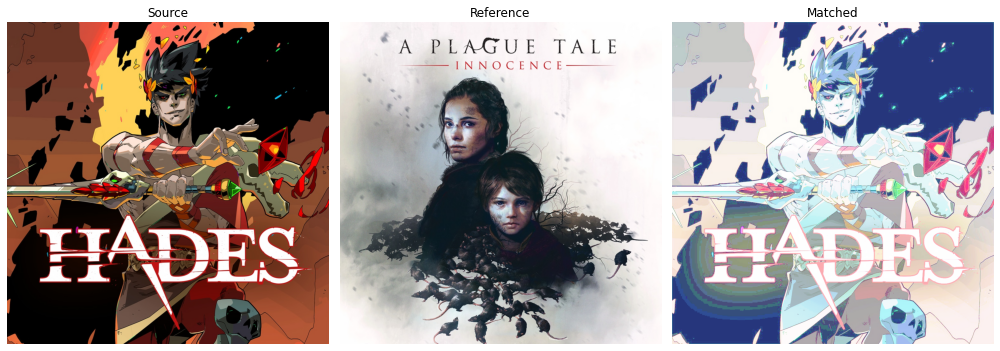

In [6]:
source = plt.imread('Hades.jpg')
reference = plt.imread('A Plague Tale.jpg')

matched = hist_matching(source, reference)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()